In [1]:
import python_course
from cs103 import start_testing, summary, expect
from typing import List, Dict

<IPython.core.display.Javascript object>

# Task 1

Create a function called `complementary_colours` that takes a `str` as an input and returns a `str`. The input str can be any one of these colours: red, green, yellow, blue, orange, purple. The output string is going to return the _complementary_ colour to the input colour.

In your function, use the supplied dictionary to perform this task (much simpler than using `if` statements to perform the task).

## Data

In [2]:
complements = {
    "blue": "orange",
    "yellow": "purple",
    "red": "green",
    "orange": "blue",
    "purple": "yellow",
    "green": "red",
}

## Function

In [3]:
def complementary_colours(colour: str) -> str:
    """
    Returns the complementary colour from the dictionary, 'complements' in
    the global namespace. If the 'colour' is not found, then "No match" is 
    returned.
    """
    return complements.get(colour, "No match")

## Tests

In [4]:
start_testing()

expect(complementary_colours('blue'), 'orange')
expect(complementary_colours('purple'), 'yellow')
expect(complementary_colours('teal'), 'No match')

summary()

3 of 3 tests passed


### Reviewer Comments

# Task 2

**Background Info**<br><br>
Steel reinforcing bars for concrete are often called up as follows on our construction drawings:

* 4-25M, means "4 pieces of 25 mm diameter bar"
* 10-15M, means "10 pieces of 15 mm diameter bar", etc.

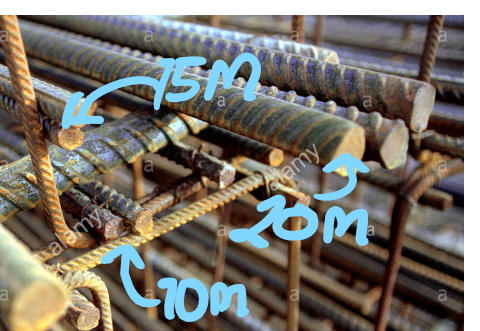

In engineering we are concerned with the total cross-sectional area of bar. To calculate this, we multiply the number of bars by the cross-sectional area of each bar. Luckily, the numbers work out evenly. Here is a list of the most commonly used bar names with their (nominal) corresponding areas.

* 10M -> 100 mm<sup>2</sup> 
* 15M -> 200 mm<sup>2</sup>
* 20M -> 300 mm<sup>2</sup>
* 25M -> 500 mm<sup>2</sup>
* 30M -> 700 mm<sup>2</sup>
* 35M -> 1000 mm<sup>2</sup>

## Task

Design a function called `total_steel_area` that takes a `str` and returns a `float`. The string will be a reinforcing bar call-up like `"4-25M"` or `"10-15M"` or `"1-35M"`. The output will represent the total area of steel that is represented by that call-up. e.g.

* `"4-25M"` -> `2000`
* `"22-15M"` -> `4400`
* etc.

To accomplish this task, _create a dictionary_ that you can use in your function to map bar names (like `"15M"`) to bar areas. 

Be sure to write your function so it can handle invalid inputs and uncommon bar sizes (e.g. `"45M"`, while it exists, will not be used in your dictionary). What should your function do if it received input of `"0.5-15M"` (cannot have half a bar) or `"1-55M"` (not in the dictionary) or `"cat-35M"` (not even a number of bars)?

You get to decide what it's behaviour is. Be sure to write tests to cover "the happy path" (valid input, as expected) but also erroneous inputs.

## Function

In [5]:
def total_steel_area(bar_spec: str) -> float:
    """
    Returns the total steel area of the bars described in 'bar_spec'
    where 'bar_spec' is a string like, "4-25M" or "100-10M" which
    describes a quantity of bar and bar size.
    
    If the bar spec is incorrect, with a non integer number of bars
    or a bar size that is not between 10M and 35M, then None is returned.
    """
    bars = {
        "10M": 100,
        "15M": 200,
        "20M": 300,
        "25M": 500,
        "30M": 700,
        "35M": 1000,
    }
    if "-" not in bar_spec:
        return None
    else:
        num_bars_str, bar_size = bar_spec.split("-") # This is called "unpacking" in python; assign both items from the split list
    
    if not num_bars_str.isdecimal():
        return None
    else:
        num_bars = int(num_bars_str)
        bar_area = bars.get(bar_size, None)
    if not bar_area:
        return None
    return num_bars * bar_area
    

## Tests

In [6]:
start_testing()

expect(total_steel_area("100-15M"), 20000)
expect(total_steel_area("1-35M"), 1000)
expect(total_steel_area("0.3-20M"), None)
expect(total_steel_area("cat-20M"), None)
expect(total_steel_area("20M"), None)

summary()

5 of 5 tests passed


### Reviewer comments

# Task 3

                                                                                                                                                                                    

Below is some data representing a model of a building as a nested dictionary. The components of the building (`"Slabs"`, `"Columns"`, `"Footings"`, etc.) are the top level keys. The "tags" are the sub-keys (`"S1"`, `"S2"`, `"S3"`, etc.) and the tags have values representing a material specification for that building component.

e.g. The slab tagged as "S1" is 450 mm thick concrete that has a compressive resistance of 35 MPa. The footing tagged "F1" is 2000 mm by 2000 mmm and is 300 mm deep made out of concrete that has a compressive resistance of 25MPa.

Design a function that takes three arguments, a building `dict`, a building component type as a `str`, and a tag as a `str`. The function returns a `str` representing the material specification for the combination of the building component and the tag in the building `dict`. 

e.g.

`my_func(building, "Columns", "C1")` returns `"500x500C35MPA"`

* If a component type is not found in the dict (e.g. "Walls") then the function should return a formatted string telling the user that the component they are looking for is not in the building dict.

* If a tag for a component is not found, then the function should return a formatted string telling the user that the tag they are looking for is not in the building dict.

* If neither the component type nor the tag are not found, then the function should just return the "component not found" string described above (because if the component is not there then obviously the tag won't be either).

### Data

In [7]:
building = {"Slabs": {"S1": "450C35MPA",
                      "S2": "250C35MPA",
                      "S3": "250C35MPA"},
            "Columns": {"C1": "500x500C35MPA",
                        "C2": "300x600C35MPA",
                        "C3": "300x400C35MPA"},
            "Footings": {"F1": "2000x2000x300C25MPA",
                         "F2": "3000x2500x300C25MPA",
                         "SF1": "300x1500C25MPA"}
              }

**Stub/Function:**

In [13]:
def get_building_material(building: Dict[str, str], component: str, tag: str) -> str:
    """
    Returns a str representing the value stored in the dictionary, 'building', at
    building[component][tag].
    
    Returns an error string if either `component` or `tag` is not found.
    """
    component_err = f"The component '{component}' was not found."
    tag_err = f"The tag '{tag}' was not found under '{component}'."
    
    component_dict = building.get(component, component_err)
    if component_dict == component_err:
        return component_err
    else:
        tag_result = component_dict.get(tag, tag_err)
        if tag_result == tag_err:
            return tag_err
        else:
            return tag_result      
    

In [14]:
start_testing()
expect(get_building_material(building, "Slabs", "S1"), "450C35MPA")
expect(get_building_material(building, "Footings", "F2"), "3000x2500x300C25MPA")
expect(get_building_material(building, "Walls", "S1"), "The component 'Walls' was not found.")
expect(get_building_material(building, "Footings", "SF2"), "The tag 'SF2' was not found under 'Footings'.")
summary()

4 of 4 tests passed


**Tests:**

Be sure to include a test to catch each of your error strings in addition to a correct result

### Reviewer comments

# Task 4

A dictionary can be useful way of storing tabular data. Below is a selection of data from the World Happiness Report ([source](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)) showing Canada's measures from 2005 to 2020. 

Tabular data has two components:

* Records - The rows; each row symbolizes one discrete instance or event
* Fields - The columns; the more columns in the table the more information is stored about a given _record_

Currently, the data below is organized by record. As a list of lists, you would have to know the numeric indices of a given data point and it would be an awkward data format to use, ie. `world_happiness_report_canada_data[4][5]` ...what record and field is that? Who knows?

It would be much better if you could access the data by _column_ and then by row, like this: `happiness_data["Generosity"][4]` to get the fifth record under the column "Generosity".

Write a function called `create_tabular_dict` that takes a list of lists and returns a `Dict[str, list]`. The keys of the dictionary should be the _fields_ in the data (e.g. "Year", "Life Ladder", "Log GDP per capita", etc.). The values in the dictionary should be a list of records whose data corresponds to the field. In other words, you should be able to access each column of data in the table by accessing the corresponding column header in the dictionary. 

So, you should be able to use the resulting dictionary as follows:

```python
canada_table = create_tabular_dict(world_happiness_report_canada_data)
print(canada_table["Year"])
```

And you should get:

```
[2005,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]
```

**Tests**

Write tests that "spot check" the data. So, if you know that the record for 2008 is in index `2` (as you can see above), you can check that the "Social support" data for 2008 can be accessed like `canada_table["Social support"][2]`. Write four spot checks for four different fields and four different records to confirm that the data in your dict is correct.


**Hints (don't look here if you don't want hints)**

This is a bit tricky. It does not take a lot of code but you have to be strategic. It took me a few minutes to figure this out, too. 

* Think of it in two steps: first create an "empty table". Use a loop to make a dictionary with just the field keys and empty records. Then start another loop (double loop?) to _append_ each data point into each empty record.
* You will probably need to use `enumerate()` to get the indexes of each field.

## Data

In [21]:
world_happiness_report_canada_data = [
    ["Year", # The first record is the field names
     "Life Ladder",
     "Log GDP per capita",
     "Social support",
     "Healthy life expectancy at birth",
     "Freedom to make life choices",
     "Generosity",
     "Perceptions of corruption",
     "Positive affect",
     "Negative affect"
    ],
    [2005,7.418,10.652,0.962,71.300,0.957,0.256,0.503,0.839,0.233],
    [2007,7.482,10.739,float('nan'),71.660,0.930,0.249,0.406,0.872,0.257],
    [2008,7.486,10.738,0.939,71.840,0.926,0.262,0.370,0.890,0.202],
    [2009,7.488,10.697,0.943,72.020,0.915,0.246,0.413,0.867,0.248],
    [2010,7.650,10.717,0.954,72.200,0.934,0.230,0.413,0.879,0.233],
    [2011,7.426,10.738,0.922,72.360,0.951,0.253,0.433,0.881,0.248],
    [2012,7.415,10.744,0.948,72.520,0.918,0.290,0.466,0.857,0.229],
    [2013,7.594,10.757,0.936,72.680,0.916,0.316,0.406,0.851,0.263],
    [2014,7.304,10.775,0.918,72.840,0.939,0.270,0.442,0.833,0.259],
    [2015,7.413,10.774,0.939,73.000,0.931,0.253,0.427,0.845,0.286],
    [2016,7.245,10.773,0.924,73.200,0.912,0.211,0.385,0.825,0.237],
    [2017,7.415,10.792,0.934,73.400,0.945,0.163,0.362,0.863,0.218],
    [2018,7.175,10.798,0.923,73.600,0.946,0.106,0.372,0.824,0.259],
    [2019,7.109,10.800,0.925,73.800,0.912,0.112,0.436,0.822,0.285],
    [2020,7.025,10.730,0.931,74.000,0.887,0.050,0.434,0.796,0.307],
]

## Function

In [42]:
def create_tabular_dict(list_of_records: List[List]) -> Dict[str, list]:
    """
    Returns a dictionary with 
    """
    columns_acc = {}

    for field in list_of_records[0]:
        rows_acc = []
        columns_acc.update({field: rows_acc})

    for record in list_of_records[1:]:
        for idx, field in enumerate(list_of_records[0]):
            columns_acc[field].append(record[idx])
    return columns_acc
    

## Tests

In [43]:
tab_data = create_tabular_dict(world_happiness_report_canada_data)

start_testing()
expect(tab_data["Year"][4], 2010)
expect(tab_data["Life Ladder"][10], 7.245)
expect(tab_data["Generosity"][0], 0.256)
summary()

3 of 3 tests passed


### Reviewer Comments

# Task 5

Using sets, design a function called `get_uniques` that has two arguments, a `List[str]` and second argument called `ascending`, which will be a `bool`. The function is to return only the unique items in the list.

The function signature will look like this:

```python
def get_uniques(los: List[str], ascending: bool = True) -> List[str]:
```

The `ascending` argument is called a "keyword argument" and it is specifying a default value for the second argument if a new value is not given.

If `ascending` is `True`, your returned list of unique items should be sorted in ascending order.
If `ascending` is `False`, your returned list of unique items shouldb be sorted in descending order.

Since `ascending` is a keyword argument, you do not necessarily need to include it when you call the function, 
e.g.

```python
get_uniques(["cat", "bat", "cat", "hat"]) # `ascending` is not given, therefore it is taken as True

# If you want `ascending` to be set to False, all of the below are equivalent

get_uniques(["cat", "bat", "cat", "hat"], False) # Now, `ascending` is given positionally and is False
get_uniques(["cat", "bat", "cat", "hat"], ascending=False) # Now it is given explicitly as a keyword arg
get_uniques(los=["cat", "bat", "cat", "hat"], ascending=False) # You can do this, also
```

You can use the built-in function `sorted()` to sort your list. Use `help(sorted)` to see how to use it.

## Function

In [28]:
def get_uniques(los: List[str], ascending=True) -> List[str]:
    """
    Returns the unique elements from 'los' sorted in either ascending or
    descending order.
    """
    return sorted(list(set(los)), reverse=not ascending)

## Tests

In [37]:
start_testing()
expect(get_uniques(["cat", "hat", "bat", "rat", "cat"], ascending=True), ["bat", "cat", "hat", "rat"])
expect(get_uniques(["cat", "hat", "bat", "rat", "cat"], ascending=False), list(reversed(["bat", "cat", "hat", "rat"])))
expect(get_uniques([], ascending=True), [])
summary()


3 of 3 tests passed


### Reviewer Comments

## Submit Workbook 🦘

Congratulations on completing Workbook 05! Dictionaries are incredibly useful in Python but it may not be obvious at first. As you begin to get 
Nice work!🤩

In [ ]:
#python_course.submit_workbook("Workbook_05", "cferster@rjc.ca", cc_me=True)